In [1]:
#28 by 28 pixels as input (array of 784 when flattened)
#output values are probabilities
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.1.0


In [2]:
#load data
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [4]:
#60000images, each with 28*28 pixels
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

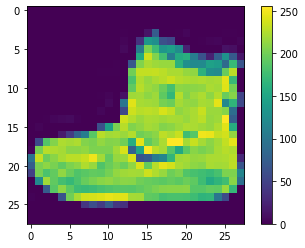

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0 

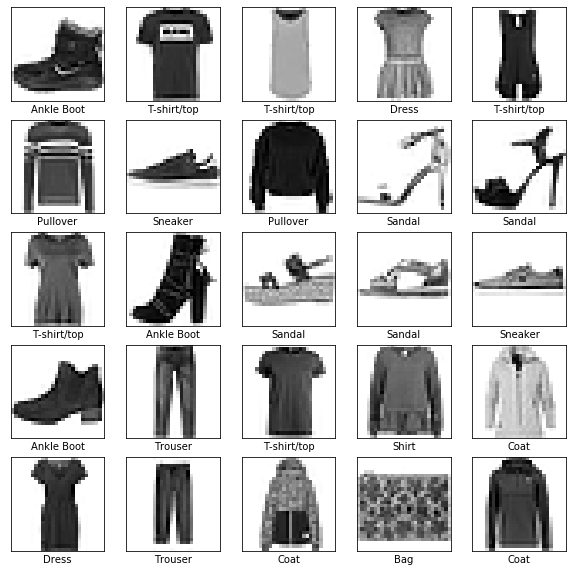

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])#레이블에 맞는 이름 출력

In [9]:
#모델 구축
model = keras.Sequential([
    #input pixel을 784개의 값을 갖는 배열로 flatten시킨다.
    keras.layers.Flatten(input_shape=(28, 28)),
    #각 픽셀값들을 첫번째 layer의 모든 뉴런으로 보낸다
    keras.layers.Dense(128, activation = tf.nn.relu),
    #10개 output
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
#하나의 epoch는 training dataset에 대한 full iteration이다.
#60000개 샘플이므로, 총 300000개 이미지에 대한 학습이 이루어진다.
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4972 - accuracy: 0.8256
Epoch 2/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3737 - accuracy: 0.8640
Epoch 3/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3380 - accuracy: 0.8790
Epoch 4/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3126 - accuracy: 0.8851
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2939 - accuracy: 0.8918


In [15]:
#evaluation on test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.3551 - accuracy: 0.8760


In [16]:
#에측하기
predictions = model.predict(test_images)

In [17]:
#첫번쨰 이미지에 대한 확률값들
predictions[0]

array([3.0614865e-05, 1.4444470e-07, 2.5892546e-06, 1.9743993e-08,
       1.1702447e-06, 1.7317578e-02, 3.5300507e-06, 3.9940681e-02,
       4.0989024e-05, 9.4266266e-01], dtype=float32)

In [19]:
#위 예측값의 확률 중 가장 큰 값 
class_num = np.argmax(predictions[0])

In [20]:
print(class_names[class_num])

Ankle Boot


In [21]:
test_labels[0]

9

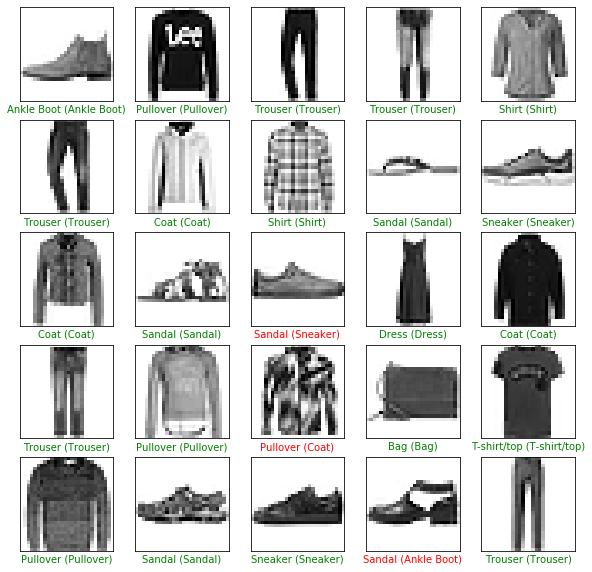

In [26]:
#if np.argmax(predictions[i]) == test_labels[0] 일 경우, 예측성공한것
plt.figure(figsize=(10, 10))
for i in range(25): #25개의 이미지에 대한 추측과 실제값 비교
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    #예측값과 (실제값)
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color = color)#레이블에 맞는 이름 출력

In [28]:
img = test_images[0]
print(img.shape)
#해상도는 28x28

(28, 28)


In [29]:
#initial dimension 추가,
#predict call이 이미지의 리스트를 입력으로 요구함
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [30]:
predictions = model.predict(img)
print(predictions)

[[3.0614865e-05 1.4444470e-07 2.5892496e-06 1.9743993e-08 1.1702447e-06
  1.7317578e-02 3.5300507e-06 3.9940674e-02 4.0989060e-05 9.4266266e-01]]


In [32]:
result = np.argmax(predictions[0])
print(result)

9
